Let's first setup our imports

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
from sklearn import datasets

## Step 1: Import and format the data

Sklearn already has the Iris dataset built in, so all we have to do is import it!

In [2]:
from sklearn import datasets

In [6]:
data = datasets.load_iris()

In [7]:
X = pd.DataFrame(data.data)
y = pd.Series(data.target)

In [9]:
X.columns = data.feature_names

In [10]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Define the "x" and "y" variables. *Remember*, y is our classifer, and x is our attributes.

## Step 2: Plot the data to estimate clusters

Plot the data using scatterplots - take a look at all the combinations of variables to get a feel for how the data is distributed. 

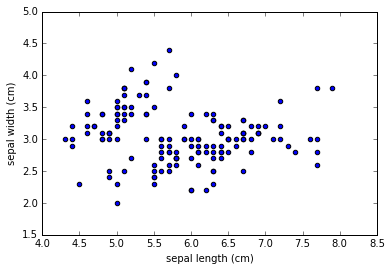

In [14]:
X.plot.scatter(x = 'sepal length (cm)', y = 'sepal width (cm)')

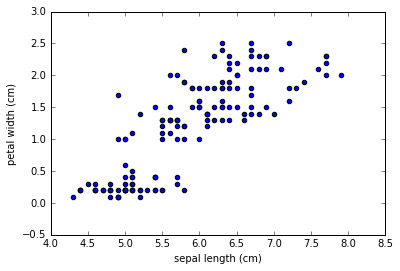

In [16]:
X.plot.scatter(x = 'sepal length (cm)', y = 'petal width (cm)')

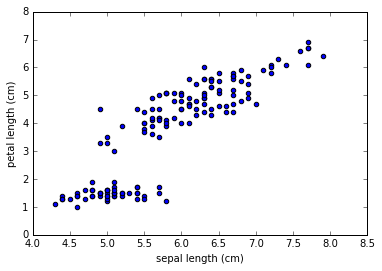

In [17]:
X.plot.scatter(x = 'sepal length (cm)', y = 'petal length (cm)')

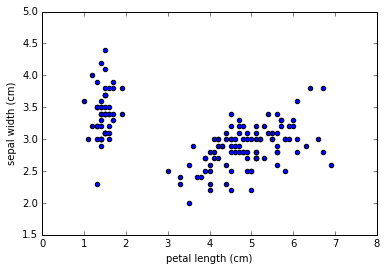

In [18]:
X.plot.scatter(x = 'petal length (cm)', y = 'sepal width (cm)')

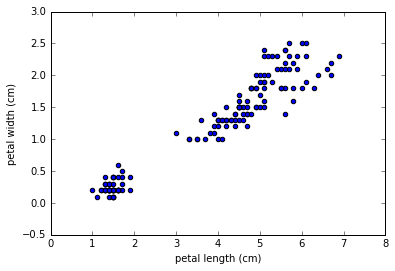

In [19]:
X.plot.scatter(x = 'petal length (cm)', y = 'petal width (cm)')

## Step 3: Cluster the data

Run the clustering analysis using scikit-learn.

*Hint*: Estimate the number of clusters, k, based on your visual examination of the distributions.

In [38]:
# Number of clusters
k = 3

from sklearn.cluster import KMeans

In [39]:
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

Compute the labels and centroids

In [40]:
labels1 = kmeans.labels_

In [41]:
from scipy import stats
labels = np.zeros_like(clusters)
for i in range(k):
    mask = (clusters == i)
    labels[mask] = stats.mode(y[mask])[0]

## Step 4: Evaluate the clusters

First, go ahead and plot the results of your clustering analysis

Plot the clusters

In [42]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
colormap = np.array(['red', 'blue', 'yellow'])

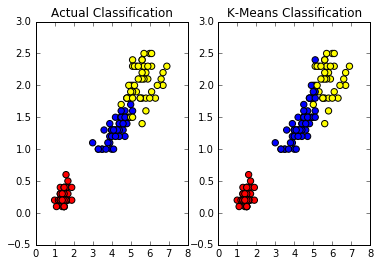

In [44]:
plt.subplot(1, 2, 1)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[y], s=40)
plt.title('Actual Classification')
 
plt.subplot(1, 2, 2)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[labels1], s=40)
plt.title('K-Means Classification')

Plot the predicted vs actual classifcations to see how our clustering analysis compares

Check the centroids to see where each cluster is lying 

In [45]:
centroids

array([[ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

Check the labels of the clusters

In [47]:
labels1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Compute the accuracy score using scikit to see how accurate our analysis is

In [48]:
from sklearn.metrics import accuracy_score

In [50]:
score = accuracy_score(y, labels1)
print score

0.893333333333


Compute the silhoutte coefficient to see how consistent our data is within the clusters

In [55]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, labels1).mean()
print sil_score

0.552591944531


Calculate the Precision, Recall, and F - Score to see the test's accuracy

In [56]:
from sklearn.metrics import classification_report

In [58]:
print classification_report(y, labels1)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.77      0.96      0.86        50
          2       0.95      0.72      0.82        50

avg / total       0.91      0.89      0.89       150



Compute the Confusion Matrix to test the performance of the clustering analysis

In [59]:
from sklearn.metrics import confusion_matrix

In [61]:
print(confusion_matrix(y, labels1))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
